# PERSONAL LOAN PROJECT 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing  required dependencies 

## IMPORTING LIBRARIES :

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## IMPORTING DATASET : 

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Bank_Personal_Loan_Modelling-1.csv")

In [ ]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [ ]:
df.skew()

ID                     0.000000
Age                   -0.029341
Experience            -0.026325
Income                 0.841339
ZIP Code             -12.500221
Family                 0.155221
CCAvg                  1.598443
Education              0.227093
Mortgage               2.104002
Personal Loan          2.743607
Securities Account     2.588268
CD Account             3.691714
Online                -0.394785
CreditCard             0.904589
dtype: float64

In [ ]:
#plt.boxplot(df)
#plt.show()

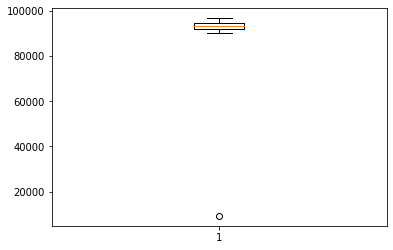

In [ ]:
plt.boxplot(df['ZIP Code'])
plt.show()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
#using zscore to find outliers in dataset

import scipy.stats as stats
outliers_df = stats.zscore(df)
outliers = outliers_df>3
#print(outliers.sum())
outliers.sum()


1010

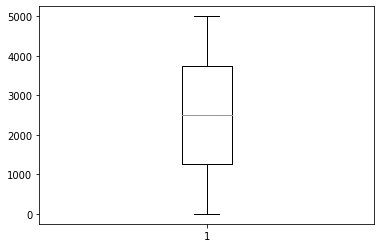

In [ ]:
plt.boxplot(df['ID'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


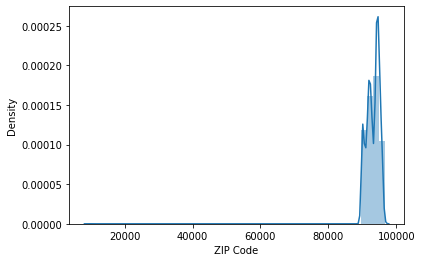

In [ ]:
sns.distplot(df['ZIP Code'])

In [ ]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [ ]:
outliers = find_outliers_IQR(df)

In [ ]:
outliers.count()

ID                      0
Age                     0
Experience              0
Income                 96
ZIP Code                1
Family                  0
CCAvg                 324
Education               0
Mortgage              291
Personal Loan         480
Securities Account    522
CD Account            302
Online                  0
CreditCard              0
dtype: int64

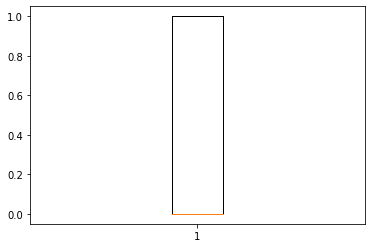

In [ ]:
plt.boxplot(df['CreditCard'])
plt.show()

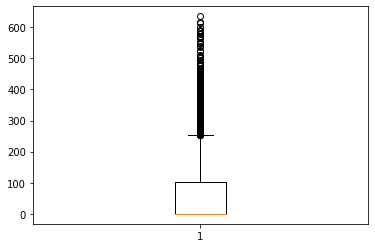

In [ ]:
plt.boxplot(x=df['Mortgage'])
plt.show()

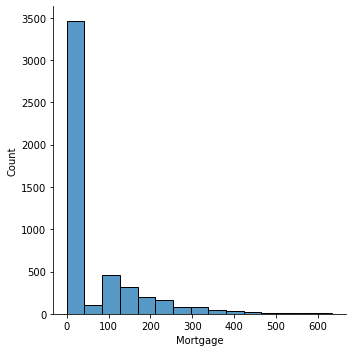

In [ ]:
sns.displot(df['Mortgage'],bins=15,kde=False)
plt.show()

In [ ]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [ ]:
#480 (i.e)1 accepted personal loan offered by customers in early campaign
#where 4520 (i.e)0 did not accepted the personal loan

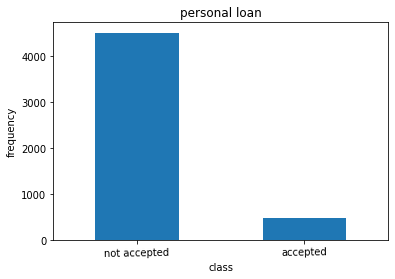

In [ ]:
count_class=pd.value_counts(df['Personal Loan'],sort=True)
count_class.plot(kind='bar',rot=1)
plt.title("personal loan")
labels=['not accepted','accepted']
plt.xticks(range(2),labels)
plt.xlabel("class")
plt.ylabel("frequency")
plt.show()

In [ ]:
df.shape

(5000, 14)

In [ ]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign. 
so the feature will be personal loan based on this historical data we can able to find prediction for purchasing loan for future customers 

here we have to set class column as Personal loan for that pandas loc function used



In [ ]:
df1=df.loc[:,['Personal Loan']]
type(df1)

pandas.core.frame.DataFrame

In [ ]:
df1.shape

(5000, 1)

In [ ]:
df2=df.loc[:,['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account','CD Account', 'Online', 'CreditCard']]
type(df2)
    

pandas.core.frame.DataFrame

In [ ]:
df2.shape

(5000, 13)

my new data frame feautures and personal loan as class column


In [ ]:
frames=[df2,df1]
data=pd.concat(frames,axis=1)

In [ ]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  Personal Loan       5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
data[(data['Experience']< 0)]['Experience'].value_counts().sum()

52

In [ ]:
data['Experience']

0        1
1       19
2       15
3        9
4        8
        ..
4995     3
4996     4
4997    39
4998    40
4999     4
Name: Experience, Length: 5000, dtype: int64

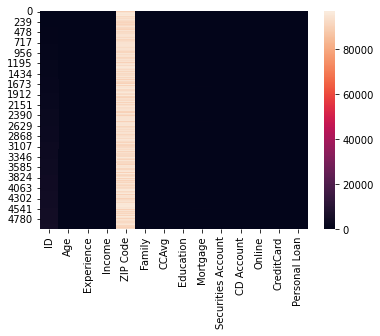

In [ ]:
 sns.heatmap(data)
 plt.show()

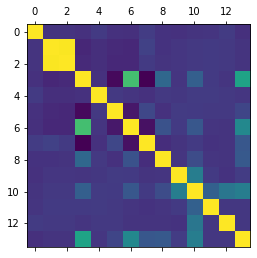

<Figure size 1152x1152 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

plt.matshow(data.corr())
plt.figure(figsize=(16,16))
plt.show()

In [ ]:
a=df.corr()
plt.figure(figsize=(12,10))
a.style.background_gradient(cmap="coolwarm")

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


<Figure size 864x720 with 0 Axes>

In [ ]:
#df[(df['Experience']< 0)]
# (data['Experience']<0)
  



i replaced this negative values in experience column as positive values

In [ ]:
data.Experience.replace(to_replace =[-1],value=1,inplace=True)
data[(data['Experience']< 0)]['Experience'].value_counts().sum()

19

In [ ]:
data.Experience.replace(to_replace =[-2],value=2,inplace=True)
data[(data['Experience']< 0)]['Experience'].value_counts().sum()

4

In [ ]:
data.Experience.replace(to_replace =[-3],value=3,inplace=True)
data[(data['Experience']< 0)]['Experience'].value_counts().sum()

0

In [ ]:
a=(data['Experience']<0)

In [ ]:
a.count()

5000

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


In [ ]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


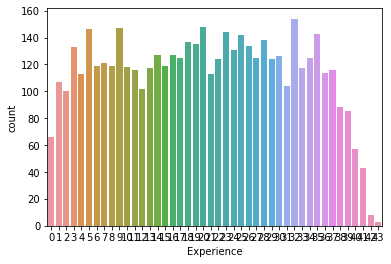

<Figure size 864x720 with 0 Axes>

In [ ]:
sns.countplot(data['Experience'])
plt.figure(figsize=(12,10))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


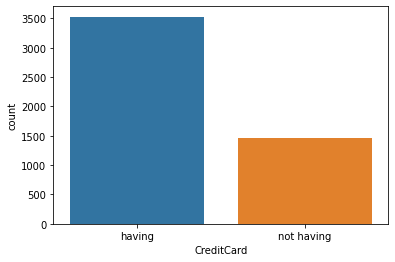

In [ ]:
sns.countplot(data['CreditCard'])
#plt.figure(figsize=(12,10))
labels=["having","not having"]
plt.xticks(range(2),labels)
plt.show()

zip code is not required column here for prediction
so i removed the zip code column from dataset

In [ ]:
data.drop(columns="ZIP Code",inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
 12  Personal Loan       5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


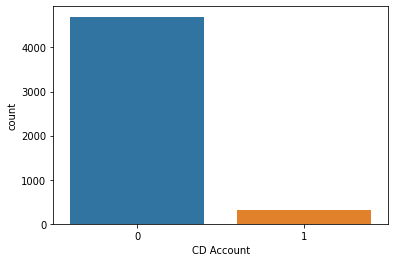

<Figure size 864x720 with 0 Axes>

In [ ]:
sns.countplot(data['CD Account'])
plt.figure(figsize=(12,10))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


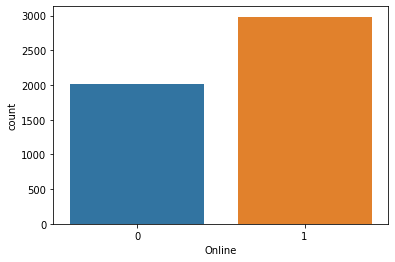

<Figure size 864x720 with 0 Axes>

In [ ]:
sns.countplot(data['Online'])
plt.figure(figsize=(12,10))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


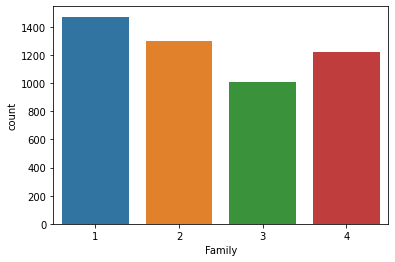

<Figure size 864x720 with 0 Axes>

In [ ]:
sns.countplot(data['Family'])
plt.figure(figsize=(12,10))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


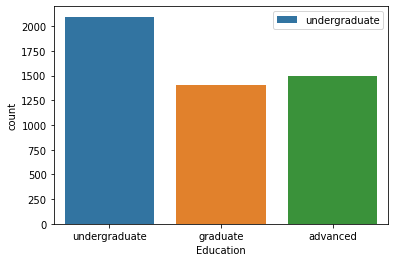

In [ ]:
sns.countplot(data['Education'])
#plt.figure(figsize=(12,10))
labels=["undergraduate","graduate","advanced"]
plt.xticks(range(3),labels)
plt.legend(labels)
plt.show()

In [ ]:
from pandas.core.algorithms import value_counts
df["Education"].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [ ]:
outliers.sum()

ID                         0.0
Age                        0.0
Experience                 0.0
Income                 18688.0
ZIP Code                9307.0
Family                     0.0
CCAvg                   2217.8
Education                  0.0
Mortgage              103498.0
Personal Loan            480.0
Securities Account       522.0
CD Account               302.0
Online                     0.0
CreditCard                 0.0
dtype: float64

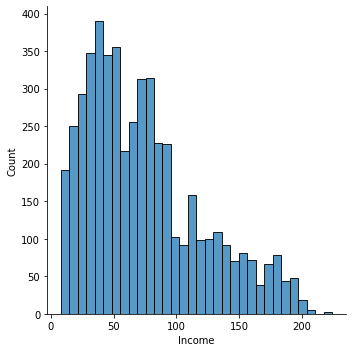

In [ ]:
#handling outliers using iqr and capping method
sns.displot(data['Income'])

In [ ]:
def find_outliers_IQR(data):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = data[((data<(q1-1.5*IQR)) | (data>(q3+1.5*IQR)))]

   return outliers

In [ ]:
#outliers = find_outliers_IQR(data)

In [ ]:
outliers.count()

ID                      0
Age                     0
Experience              0
Income                 96
ZIP Code                1
Family                  0
CCAvg                 324
Education               0
Mortgage              291
Personal Loan         480
Securities Account    522
CD Account            302
Online                  0
CreditCard              0
dtype: int64

In [ ]:
data.head()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,1,0


In [ ]:
np.cov(data)

array([[ 2.09245641e+02,  1.78626923e+02,  9.01679487e+01, ...,
        -2.09882205e+03, -2.00831282e+03, -1.92931949e+03],
       [ 1.78626923e+02,  2.23897436e+02,  1.53653846e+02, ...,
        -2.30194615e+03, -2.24228846e+03, -2.31584679e+03],
       [ 9.01679487e+01,  1.53653846e+02,  1.24269231e+02, ...,
        -8.09047436e+02, -7.91858974e+02, -9.08592308e+02],
       ...,
       [-2.09882205e+03, -2.30194615e+03, -8.09047436e+02, ...,
         1.91352155e+06,  1.91300874e+06,  1.91442133e+06],
       [-2.00831282e+03, -2.24228846e+03, -7.91858974e+02, ...,
         1.91300874e+06,  1.91254292e+06,  1.91402465e+06],
       [-1.92931949e+03, -2.31584679e+03, -9.08592308e+02, ...,
         1.91442133e+06,  1.91402465e+06,  1.91581594e+06]])

In [ ]:
data.loc[:,['Mortgage']]

,Mortgage
0,0
1,0
2,0
3,0
4,0
...,...
4995,0
4996,85
4997,0
4998,0


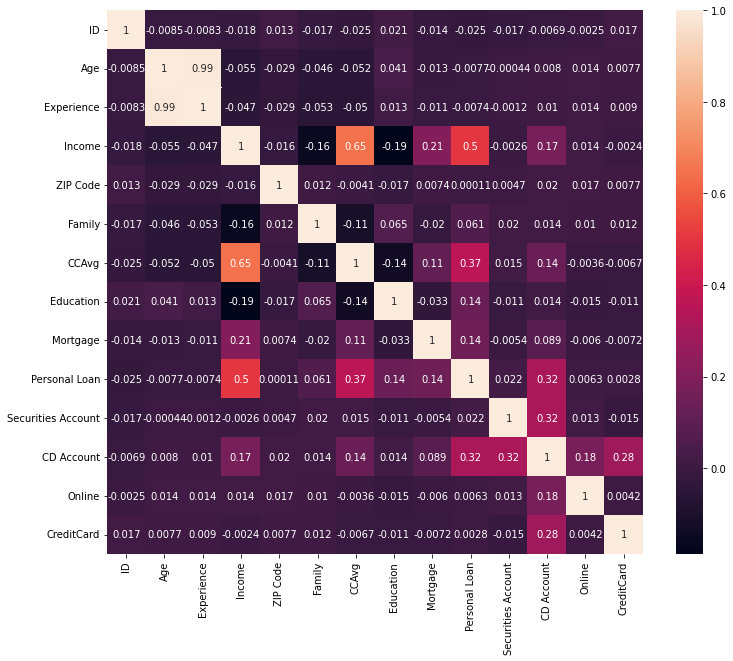

In [ ]:
plt.figure(figsize=(12,10))
cor=df.corr()
sns.heatmap(cor,annot=True)
plt.show()

In [ ]:
def correlation(dataset, threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i, j])> threshold:
        colname = corr_matrix.columns[i] 
        col_corr.add(colname)
  return col_corr
  

In [ ]:
corr_features= correlation(data, 0.5)

In [ ]:
corr_features

{'CCAvg', 'Experience', 'Personal Loan'}

In [ ]:
data.drop(["CCAvg","Experience"],axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   ID                  5000 non-null   int64
 1   Age                 5000 non-null   int64
 2   Income              5000 non-null   int64
 3   Family              5000 non-null   int64
 4   Education           5000 non-null   int64
 5   Mortgage            5000 non-null   int64
 6   Securities Account  5000 non-null   int64
 7   CD Account          5000 non-null   int64
 8   Online              5000 non-null   int64
 9   CreditCard          5000 non-null   int64
 10  Personal Loan       5000 non-null   int64
dtypes: int64(11)
memory usage: 429.8 KB


In [ ]:
data.head()

,ID,Age,Income,Family,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,49,4,1,0,1,0,0,0,0
1,2,45,34,3,1,0,1,0,0,0,0
2,3,39,11,1,1,0,0,0,0,0,0
3,4,35,100,1,2,0,0,0,0,0,0
4,5,35,45,4,2,0,0,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
X=data.drop(['Personal Loan'],axis=1)
Y=data['Personal Loan']
X.shape
#Y.head()

(5000, 10)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
X, Y, test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(3500, 10) (1500, 10) (3500,) (1500,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


In [ ]:
#model=LogisticRegression()
model1=KNeighborsClassifier(n_neighbors=3)
model2=GaussianNB()
model3=DecisionTreeClassifier()

In [ ]:
#model.fit(X_train,y_train)
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
X_train_prediction=model1.predict(X_train)
training_data_accuracy_KNN=accuracy_score(X_train_prediction,y_train)
training_data_accuracy_KNN

0.9342857142857143

In [ ]:
X_test_prediction=model1.predict(X_test)
test_data_accuracy=accuracy_score(y_test,X_test_prediction)
print("KNN algorithm:",test_data_accuracy)
test_data_precision=precision_score(y_test,X_test_prediction)
print("KNN algorithm:",test_data_precision)
test_data_recall=recall_score(y_test,X_test_prediction)
print("KNN algorithm:",test_data_recall)

KNN algorithm: 0.8806666666666667
KNN algorithm: 0.3804347826086957
KNN algorithm: 0.2229299363057325


In [ ]:
X_train_prediction=model2.predict(X_train)
training_data_accuracy_GB=accuracy_score(X_train_prediction,y_train)
print("gaussian alg:",training_data_accuracy_GB)


gaussian alg: 0.9014285714285715


In [ ]:
X_train_prediction=model3.predict(X_train)
training_data_accuracy_DT=accuracy_score(X_train_prediction,y_train)
training_data_accuracy_DT

1.0

In [ ]:
X_test_prediction=model3.predict(X_test)
test_data_accuracy_DT=accuracy_score(y_test,X_test_prediction)
print("decision algorithm:",test_data_accuracy)
test_data_precision_DT=precision_score(y_test,X_test_prediction)
print("decision algorithm:",test_data_precision_DT)
test_data_recall_DT=recall_score(y_test,X_test_prediction)
print("decision algorithm:",test_data_recall_DT)

decision algorithm: 0.8806666666666667
decision algorithm: 0.8701298701298701
decision algorithm: 0.8535031847133758
